# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Andes Potipera Sitepu
- **Email:** andessitepu221204@gmail.com
- **ID Dicoding:** andes_sitepu

## Menentukan Pertanyaan Bisnis

- Bagaimana jam, suhu, musim, kelembapan memengaruhi pola penggunaan sepeda setiap harinya?
- Bagaimana perbedaan hari peminjaman memengaruhi pola penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import t

## Data Wrangling

### Gathering Data

In [119]:
hour_df = pd.read_csv('hour.csv')

day_df = pd.read_csv('day.csv')

Pada tahap gathering data, kita mulai dengan membaca dua file yaitu hour.csv dan day.csv dengan pandas. Data dari kedua file tersebut dimuat sebagai data frame yang bernama hour_df dan day_df dan perubahan tersebut memungkinkan dilakukannya operasi analisis data.


### Assessing Data

In [120]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [121]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dataset diatas terdiri atas beberapa jenis data sebagai berikut:

Data numerik:

- Temp (Temperature) : Merupakan suhu dalam skala Celsius. 
- Atemp (Adjusted temperature) : Bagaimana suhu (dalam skala celcius) sebenarnya dirasakan oleh orang.
- Hum (Humidity): Merupakan tingkat kelembaban.
- Windspeed : Merupakan kecepatan angin.
- Casual : Merupakan jumlah pengguna sepeda sewaan yang kasual.
- Registered : Merupakan jumlah pengguna sepeda sewaan yang terdaftar.
- Cnt (Count): Merupakan total sepeda yang disewakan.

Data Kategorik:

- Season: Merupakan musim dalam tahun (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- Year : Merupakan tahun (0: 2011, 1: 2012).
- Month : Merupakan bulan dalam tahun.
- Hour : Menunjukkan jam.
- Holiday : Merupakan hari libur (1 jika adalah hari libur, 0 jika tidak).
- Weekday : Merupakan hari dalam seminggu.
- Workingday : Merupakan hari kerja (1 jika adalah hari kerja, 0 jika tidak).
- Weathersit (Weather situation): Merupakan kondisi cuaca (1: Cerah, sedikit awan, sebagian cerah, 2: Berkabut + mendung, berkabut + awan rusak, berkabut + sebagian cerah, berkabut, 3: Hujan ringan, petir, awan terpencar, hujan ringan + awan terpencar, 4: Hujan lebat, hujan es + petir + kabut, salju + kabut).

In [123]:
hour_df.info()
print()

day_df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex

Berdasarkan Data Hour.csv dan Day.csv, diketahui bahwa kolom 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', dan 'weathersit' bertipe data int64 (numerik). Data tersebut seharusnya bertipe data kategorik sehingga akan dilakukan transformasi tipe data.

In [124]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil diatas dapat dilihat bahwa tidak ada missing value pada data hour.csv.

In [125]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil diatas dapat dilihat bahwa tidak ada missing value pada data day.csv.

In [126]:
data_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - 1.5 * IQR
    maximum = Q3 + 1.5 * IQR
    outliers = data[(data[column] < minimum) | (data[column] > maximum)]
    return outliers

print('Outlier pada data hour.csv :')
for column in data_columns:
    hour_outliers = detect_outliers(hour_df, column)
    print(f'Jumlah outliers pada kolom {column} : {len(hour_outliers)}')

print()
print('Outlier pada data day.csv :')
for column in data_columns:
    day_outliers = detect_outliers(day_df, column)
    print(f'Jumlah outliers pada kolom {column} : {len(day_outliers)}')

Outlier pada data hour.csv :
Jumlah outliers pada kolom temp : 0
Jumlah outliers pada kolom atemp : 0
Jumlah outliers pada kolom hum : 22
Jumlah outliers pada kolom windspeed : 342
Jumlah outliers pada kolom casual : 1192
Jumlah outliers pada kolom registered : 680
Jumlah outliers pada kolom cnt : 505

Outlier pada data day.csv :
Jumlah outliers pada kolom temp : 0
Jumlah outliers pada kolom atemp : 0
Jumlah outliers pada kolom hum : 2
Jumlah outliers pada kolom windspeed : 13
Jumlah outliers pada kolom casual : 44
Jumlah outliers pada kolom registered : 0
Jumlah outliers pada kolom cnt : 0


Dari hasil diatas, terdapat outlier yang terdeteksi. Pada data hour.csv, outlier ditemukan pada kolom 'hum' sebanyak 22, 'windspeed' sebanyak 342, 'casual' sebanyak 1.192, 'registered' sebanyak 680, dan 'cnt' sebanyak 505. Sedangkan pada data day.csv, outlier terdeteksi pada kolom 'hum' sebanyak 2, 'windspeed' sebanyak 13, dan 'casual' sebanyak 44. Berdasarkan hal ini dapat disimpulkan terdapat nilai ekstrim pada kedua data set yang harus diperhatikan.

In [127]:
print('Jumlah Duplikasi Data Day  : ',day_df.duplicated().sum())
print('Jumlah Duplikasi Data Hour : ', hour_df.duplicated().sum())


Jumlah Duplikasi Data Day  :  0
Jumlah Duplikasi Data Hour :  0


Berdasarkan hasil diatas diketahui bahwa tidak ada data yang terduplikasi baik pada dataset day.csv maupun hour.csv.

### Cleaning Data

In [128]:
hour_categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
hour_df[hour_categorical_columns] = hour_df[hour_categorical_columns].astype('category')

day_categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
day_df[day_categorical_columns] = day_df[day_categorical_columns].astype('category')

print(hour_df.dtypes)
print()
print(day_df.dtypes)

instant          int64
dteday          object
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object


Berdasarkan hasil diatas, kolom-kolom seperti 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', dan 'weathersit' telah diubah menjadi tipe data category dimana tipe data tersebut telah sesuai karena kolom-kolom tersebut seharusnya bertipe data kategorik.

In [129]:
def impute_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - 1.5 * IQR
    maximum = Q3 + 1.5 * IQR

    data[column] = data[column].apply(lambda x: maximum if x > maximum else (minimum if x < minimum else x))

columns_hour = ['hum', 'windspeed', 'casual', 'registered', 'cnt']
for column in columns_hour:
    impute_outliers(hour_df, column)
    impute_outliers(day_df, column)



Hal berikutnya adalah mengatasi outlier. Dalam mengatasi outlier kali ini, tidak dilakukan penghapusan data secara langsung yang dapat mengurangi jumlah sampel yang tersedia tetapi dilakukan dengan menggunakan metode imputasi dimana metode ini dapat mempertahankan ukuran dari sampel.

In [131]:
data_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - 1.5 * IQR
    maximum = Q3 + 1.5 * IQR
    outliers = data[(data[column] < minimum) | (data[column] > maximum)]
    return outliers

print('Outlier pada data hour.csv :')
for column in data_columns:
    hour_outliers = detect_outliers(hour_df, column)
    print(f'Jumlah outliers pada kolom {column} : {len(hour_outliers)}')

print()
print('Outlier pada data day.csv :')
for column in data_columns:
    day_outliers = detect_outliers(day_df, column)
    print(f'Jumlah outliers pada kolom {column} : {len(day_outliers)}')

Outlier pada data hour.csv :
Jumlah outliers pada kolom temp : 0
Jumlah outliers pada kolom atemp : 0
Jumlah outliers pada kolom hum : 0
Jumlah outliers pada kolom windspeed : 0
Jumlah outliers pada kolom casual : 0
Jumlah outliers pada kolom registered : 0
Jumlah outliers pada kolom cnt : 0

Outlier pada data day.csv :
Jumlah outliers pada kolom temp : 0
Jumlah outliers pada kolom atemp : 0
Jumlah outliers pada kolom hum : 0
Jumlah outliers pada kolom windspeed : 0
Jumlah outliers pada kolom casual : 0
Jumlah outliers pada kolom registered : 0
Jumlah outliers pada kolom cnt : 0


Berdasarkan hasil diatas, dapat diketahui bahwa sudah tidak terdapat lagi outlier, ini menunjukkan bahwa kolom-kolom telah berada pada rentag nilai yang diharapkan.

## Exploratory Data Analysis (EDA)

### explore data orders

In [132]:
hour_df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627267,0.188691,31.158812,148.645204,186.361327
std,5017.0295,0.192556,0.171850,0.192809,0.118197,34.813147,135.351791,171.931168
min,1.0000,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.477500,114.000000,499.000000,642.500000


fungsi describe() menyajikan informasi seperti jumlah data (count), mean, standar deviasi (std), nilai minimum (min), nilai maksimum (max), kuartil pertama (25%), median (50%), kuartil ketiga (75%).

In [133]:

mean_rental_casual_weekend = hour_df[hour_df['holiday'] == 1]['casual'].mean()
mean_rental_registered_weekend = hour_df[hour_df['holiday'] == 1]['registered'].mean()

mean_rental_casual_workingday = hour_df[hour_df['workingday'] == 1]['casual'].mean()
mean_rental_registered_workingday = hour_df[hour_df['workingday'] == 1]['registered'].mean()

print("Peminjaman Sepeda di Hari Kerja :")
print("Rata-rata peminjaman sepeda 'casual' :", mean_rental_casual_workingday)
print("Rata-rata peminjaman sepeda 'registered' :", mean_rental_registered_workingday)
print("")
print("Peminjaman Sepeda di Hari Libur :")
print("Rata-rata peminjaman sepeda 'casual' :", mean_rental_casual_weekend)
print("Rata-rata peminjaman sepeda 'registered' :", mean_rental_registered_weekend)

     

Peminjaman Sepeda di Hari Kerja :
Rata-rata peminjaman sepeda 'casual' : 25.26936367467341
Rata-rata peminjaman sepeda 'registered' : 160.14150863885376

Peminjaman Sepeda di Hari Libur :
Rata-rata peminjaman sepeda 'casual' : 36.788
Rata-rata peminjaman sepeda 'registered' : 111.606


Berdasarkan hasil perhitungan diatas yang membandingkan rata-rata peminjaman sepeda casual dan registered pada hari libur dan hari kerja, dapat dilihat bahwa peminjaman di hari kerja cenderung lebih banyak dibandingkan dengan peminjaman di hari libur dimana rata-rata peminjaman sepeda di hari kerja adalah 25.26 untuk 'casual' serta 160.14 untuk 'registered' dan rata-rata peminjaman sepeda di hari libur adalah 36.78 untuk 'casual' dan 111.6 untuk 'registered'

In [135]:
data_libur = hour_df[hour_df['holiday'] == 1]
data_kerja = hour_df[hour_df['workingday'] == 1]

jumlah_peminjaman_libur = data_libur['cnt'].sum()
jumlah_peminjaman_kerja = data_kerja['cnt'].sum()

statistik, p_value = ttest_ind(data_libur['cnt'], data_kerja['cnt'])

if p_value < 0.05:
    hasil = "Terdapat perbedaan jumlah peminjaman sepeda yang signifikan antara hari kerja dan hari libur."
else:
    hasil = "Tidak terdapat perbedaan jumlah peminjaman sepeda yang signifikan antara hari kerja dan hari libur."

print("----Pengujian Statistik----")
print("Statistik:", statistik)
print("Nilai P:", p_value)
print()
print("Hasil : " + hasil)

----Pengujian Statistik----
Statistik: -4.123696429059455
Nilai P: 3.752774602057506e-05

Hasil : Terdapat perbedaan jumlah peminjaman sepeda yang signifikan antara hari kerja dan hari libur.


Analisis ini terdiri dari dua tahap utama. Pertama, data dibagi menjadi dua kategori berdasarkan status hari, yaitu hari libur dan hari kerja. Jumlah total peminjaman sepeda dihitung untuk masing-masing kategori. Kedua, dilakukan uji statistik menggunakan t-test independen untuk membandingkan rata-rata peminjaman sepeda antara kedua kelompok tersebut. Hasil menunjukkan nilai p yang sangat kecil, yang mengindikasikan adanya perbedaan signifikan dalam jumlah peminjaman sepeda antara hari libur dan hari kerja. Proses penghitungan uji statistik mencakup perhitungan t-statistic, yang menunjukkan seberapa besar perbedaan rata-rata antara kedua kelompok. Nilai p juga digunakan untuk menilai signifikansi statistik. Semakin kecil nilai p, semakin kecil kemungkinan bahwa perbedaan yang teramati disebabkan oleh faktor acak, sehingga memperkuat kesimpulan bahwa terdapat perbedaan jumlah peminjaman sepeda yang signifikan antara hari kerja dan hari libur.

In [136]:
correlation_season = hour_df['season'].corr(hour_df['cnt'])
correlation_windspeed = hour_df['windspeed'].corr(hour_df['cnt'])
correlation_temperature = hour_df['temp'].corr(hour_df['cnt'])
correlation_humidity = hour_df['hum'].corr(hour_df['cnt'])
correlation_weathersit = hour_df['weathersit'].corr(hour_df['cnt'])

print("Korelasi antara 'season' dan 'count':", correlation_season)
print("Korelasi antara 'windspeed' dan 'count':", correlation_windspeed)
print("Korelasi antara 'temperature' dan 'count':", correlation_temperature)
print("Korelasi antara 'humidity' dan 'count':", correlation_humidity)
print("Korelasi antara 'weathersit' dan 'count':", correlation_weathersit)

Korelasi antara 'season' dan 'count': 0.17972802256974424
Korelasi antara 'windspeed' dan 'count': 0.10090620655538468
Korelasi antara 'temperature' dan 'count': 0.41113303232922477
Korelasi antara 'humidity' dan 'count': -0.3299255394927958
Korelasi antara 'weathersit' dan 'count': -0.14443909283929307


Korelasi variabel dengan jumlah peminjaman sepeda (count) pada hour_df:

- Korelasi antara 'season' (Musim) dan 'count' adalah 0.18, menunjukkan hubungan positif yang lemah antara musim dan jumlah total peminjaman sepeda.

- Korelasi antara 'windspeed' (Kecepatan Angin) dan 'count' adalah 0.10, menunjukkan hubungan positif yang lemah antara kecepatan angin dan jumlah peminjaman sepeda.

- Korelasi antara 'temperature' (Suhu) dan 'count' adalah 0.41, menunjukkan hubungan positif yang kuat antara suhu dan jumlah peminjaman sepeda.

- Korelasi antara 'humidity' (Kelembapan) dan 'count' adalah -0.33, menunjukkan hubungan negatif yang kuat antara kelembapan udara dan jumlah peminjaman sepeda.

- Korelasi antara 'weathersit' (Kondisi Cuaca) dan 'count' adalah -0.14, menunjukkan hubungan negatif yang lemah antara kondisi cuaca dan jumlah peminjaman sepeda.

In [137]:
def calculate_t_statistic(r, N):
    return r * ((N - 2) ** 0.5) / ((1 - r ** 2) ** 0.5)

variables = ['season', 'windspeed', 'temp', 'hum', 'weathersit']

alpha = 0.05

for var in variables:
    r = hour_df['cnt'].corr(hour_df[var])  
    N = len(hour_df)  
    t_statistic = calculate_t_statistic(r, N) 
    df = N - 2  
    critical_t = t.ppf(1 - alpha/2, df)  

    print(f"Variabel: {var}")
    print(f"Korelasi: {r}")
    print(f"t-statistic: {t_statistic}")
    print(f"Critical t-value: {critical_t}")
    if abs(t_statistic) > critical_t:
        print("Terdapat korelasi yang signifikan antara", "'" + var + "'", "dan 'count'.")
    else:
        print("Tidak terdapat korelasi antara", "'" + var + "'", "dan 'count'.")
    print()

Variabel: season
Korelasi: 0.17972802256974424
t-statistic: 24.084260239475153
Critical t-value: 1.9601005117694967
Terdapat korelasi yang signifikan antara 'season' dan 'count'.

Variabel: windspeed
Korelasi: 0.10090620655538467
t-statistic: 13.369883418525232
Critical t-value: 1.9601005117694967
Terdapat korelasi yang signifikan antara 'windspeed' dan 'count'.

Variabel: temp
Korelasi: 0.41113303232922477
t-statistic: 59.453468486976654
Critical t-value: 1.9601005117694967
Terdapat korelasi yang signifikan antara 'temp' dan 'count'.

Variabel: hum
Korelasi: -0.3299255394927958
t-statistic: -46.07105318205433
Critical t-value: 1.9601005117694967
Terdapat korelasi yang signifikan antara 'hum' dan 'count'.

Variabel: weathersit
Korelasi: -0.14443909283929307
t-statistic: -19.242005938374028
Critical t-value: 1.9601005117694967
Terdapat korelasi yang signifikan antara 'weathersit' dan 'count'.



Pada analisis diatas menggunakan t-test untuk menentukan apakah terdapat korelasi yang signifikan antara variabel season, windspeed, temp, hum, dan weathersit dengan variabel count.

Hasil dari analisis tersebut menunjukkan bahwa pada setiap variabel, nilai t-statistic lebih besar dari nilai kritis t. Ini berarti terdapat korelasi yang signifikan antara setiap variabel (season, windspeed, temp, hum, dan weathersit) dengan count atau jumlah peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana jam, suhu, musim, kelembapan memengaruhi pola penggunaan sepeda setiap harinya?

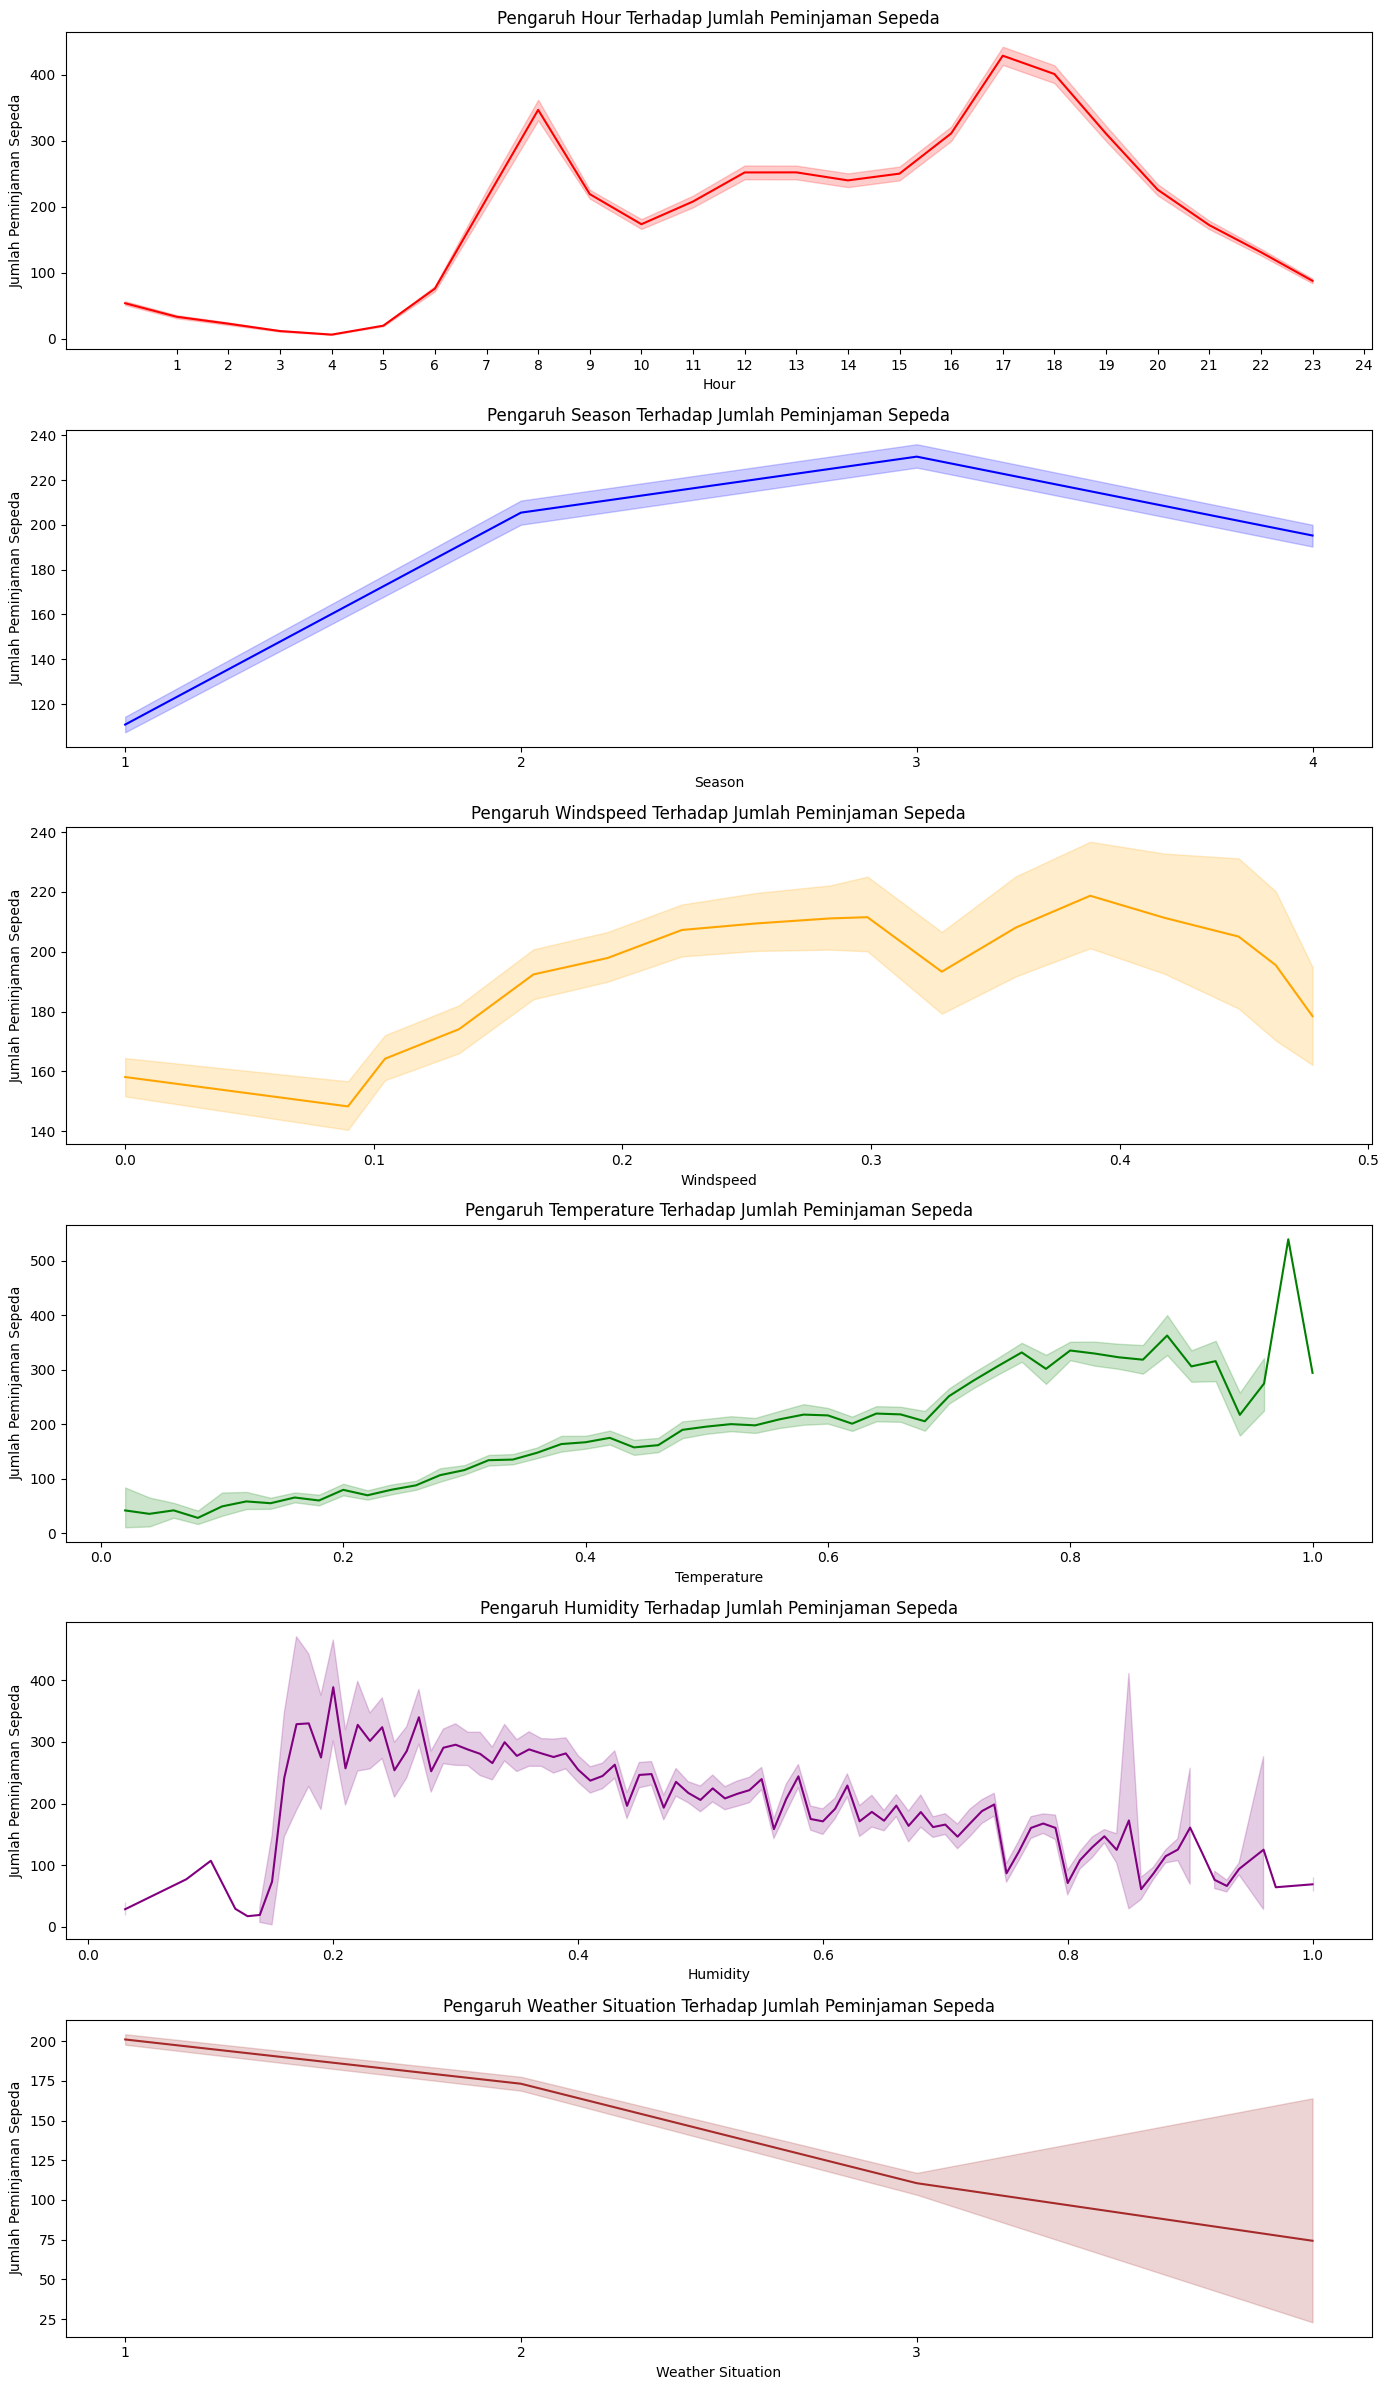

In [138]:
plt.figure(figsize=(14, 24))

plt.subplot(6, 1, 1)
sns.lineplot(data=hour_df, x='hr', y='cnt', color='red')
plt.title('Pengaruh Hour Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Hour')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(np.arange(1, 25, 1))  

plt.subplot(6, 1, 2)
sns.lineplot(data=hour_df, x='season', y='cnt', color='blue')
plt.title('Pengaruh Season Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Season')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(np.arange(1, 5, 1))  

plt.subplot(6, 1, 3)
sns.lineplot(data=hour_df, x='windspeed', y='cnt', color='orange')
plt.title('Pengaruh Windspeed Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Windspeed')
plt.ylabel('Jumlah Peminjaman Sepeda')

plt.subplot(6, 1, 4)
sns.lineplot(data=hour_df, x='temp', y='cnt', color='green')
plt.title('Pengaruh Temperature Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Peminjaman Sepeda')

plt.subplot(6, 1, 5)
sns.lineplot(data=hour_df, x='hum', y='cnt', color='purple')
plt.title('Pengaruh Humidity Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Humidity')
plt.ylabel('Jumlah Peminjaman Sepeda')

plt.subplot(6, 1, 6)
sns.lineplot(data=hour_df, x='weathersit', y='cnt', color='brown')
plt.title('Pengaruh Weather Situation Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Weather Situation')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(np.arange(1, 4, 1))  

plt.tight_layout()
plt.show()

- Pada Pengaruh Jam terhadap Jumlah Peminjaman Sepeda, terlihat bahwa pada Pukul 7-8 terdapat kenaikan pada jumlah peminjaman sepeda, hal ini terjadi karena orang-orang meminjam sepeda di pagi hari untuk berangkat ke tempat kerja. Pada Pukul 16-17 terjadi kenaikan pada jumlah peminjaman sepeda dan puncak jumlah peminjaman sepeda terjadi pada pukul 17, hal ini terjadi karena orang-orang meminjam sepeda untuk pulang dari tempat kerja mereka. Sehingga strategi yang dapat dilakukan adalah meningkatkan harga peminjaman sepeda pada jam sibuk tersebut untuk meningkatkan keuntungan yang diperoleh.

- Pada pengaruh musim terhadap jumlah peminjaman sepeda, terlihat bahwa mulai dari musim semi (1) hingga musim gugur (3) terdapat kenaikan pada jumlah peminjaman sepeda, hal ini terjadi karena kondisi musim yang lebih mendukung untuk menggunakan sepeda tetapi mulai dari musim gugur (3) hingga musim dingin terjadi penurunan jumlah peminjaman sepeda karena musim tersebut tidak mendukung penggunaan sepeda. Sehingga strategi yang dapat diterapkan adalah dengan mengganti sepeda agar menjadi lebih cocok di musim dingin.

- Pada pengaruh windspeed dan temperature ternyata berbanding lurus dengan jumlah peminjaman sepeda, hal ini terjadi karena orang-orang lebih menyukai cuaca yang cerah dengan angin yang kencang untuk menggunakan sepeda.

- Pada pengaruh kenaikan humidity berbanding terbalik dengan jumlah peminjaman sepeda, hal ini terjadi karena orang-orang tidak menyukai cuaca yang lembap untuk menggunakan sepeda.

- Pada pengaruh cuaca terhadap jumlah peminjaman sepeda dapat dilihat bahwa jumlah terbanyak peminjaman sepeda ada pada situasi 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) dan terjadi penurunan pada situasi 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds) hingga situasi 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) dan seterusnya, berdasarkan hal ini dapat disimpulkan bahwa semakin buruk situasi cuacanya maka orang-orang akan semakin enggan untuk menggunakan sepeda dimana hal ini menyebabkan penurunan jumlah peminjaman sepeda.

### Pertanyaan 2: Bagaimana perbedaan hari peminjaman memengaruhi pola penggunaan sepeda?

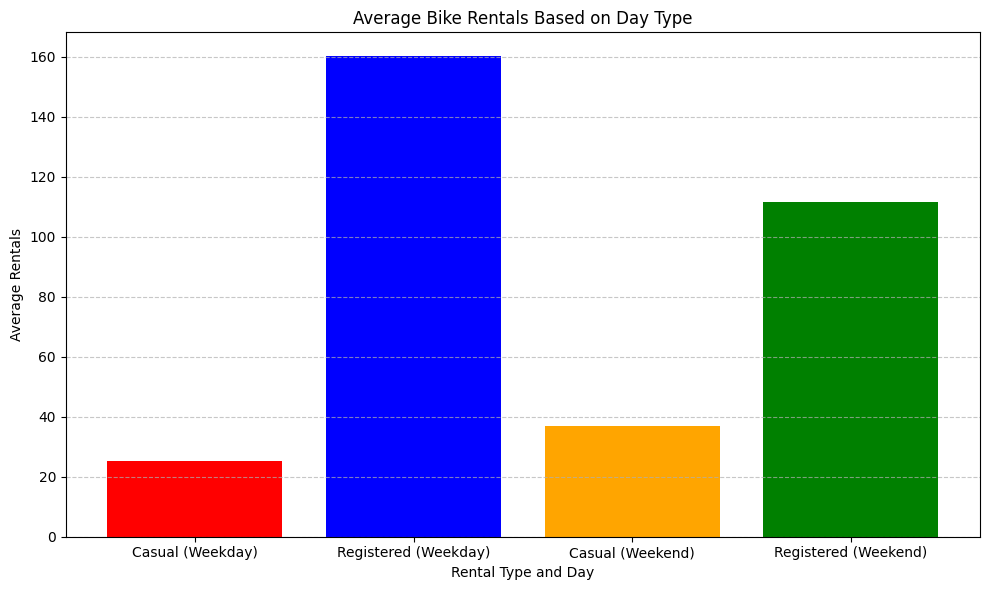

In [139]:
categories = ['Casual (Weekday)', 'Registered (Weekday)', 'Casual (Weekend)', 'Registered (Weekend)']
means = [mean_rental_casual_workingday, mean_rental_registered_workingday, mean_rental_casual_weekend, mean_rental_registered_weekend]

plt.figure(figsize=(10, 6))
plt.bar(categories, means, color=['red', 'blue', 'orange', 'green'])
plt.title('Average Bike Rentals Based on Day Type')
plt.xlabel('Rental Type and Day')
plt.ylabel('Average Rentals')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Seperti perhitungan yang telah dilakukan sebelumnya untuk membandingkan jumlah peminjaman sepeda pada hari kerja dan hari libur, berdasarkan grafik batang dapat dilihat bahwa jumlah peminjaman sepeda pada hari kerja melebihi jumlah peminjaman sepeda pada hari libur.

Strategi yang dapat dilakukan adalah dengan menambah promosi pada hari libur untuk meningkatkan jumlah peminjaman sepeda.

## Conclusion

**Conclution pertanyaan 1 : Bagaimana jam, suhu, musim, kelembapan memengaruhi pola penggunaan sepeda setiap harinya?**

Berdasarkan analisis yang telah dilakukan terhadap pengaruh varibel-variabel tersebut dengan jumlah peminjaman sepeda dapat disimpulkan bahwa orang-orang lebih menyukai kondisi cuaca yang lebih baik untuk menggunakan sepeda seperti cuaca yang cerah dengan kelembapan yang rendah. Orang-orang juga menggunakan sepeda untuk pergi berangkat ke tempat kerja mereka karena terjadi kenaikan jumlah peminjaman sepeda menjelang jam masuk kerja dan jam pulang kerja.

**Conclution pertanyaan 2 : Bagaimana perbedaan hari peminjaman memengaruhi pola penggunaan sepeda?**

Berdasarkan perhitungan yang telah dilakukan untuk melihat perbedaan dari jumlah peminjaman pada kedua hari tersebut dapat disimpulkan bahwa jumlah peminjaman sepeda lebih banyak terjadi pada hari kerja, hal ini terjadi karena orang-orang lebih sering menggunakan sepeda untuk berangkat atau pulang dari tempat kerja mereka yang dimana terjadi pada hari kerja, hal ini didasari pada analisis untuk pertanyaan 1 yaitu pada bagian "pengaruh jam terhadap jumlah peminjaman sepeda" dimana kenaikan jumlah peminjaman sepeda terjadi menjelenag jam masuk kerja dan jam pulang kerja.